# Basic Exploration & Manipulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
original = pd.read_csv('tips.csv')
df = original.copy()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
# Viewing the data to understand it
print(df.head(10))
print()
print(df.tail(10))
print()
print(df.sample(10))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240   

In [3]:
# Checking for any null values and seeing the data type for each column
print(df.isnull().sum())
print()
print(df.dtypes)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [4]:
# Seeing the unique values for each text column
print(df['sex'].unique(), df['smoker'].unique(),df['day'].unique(),df['time'].unique())

['Female' 'Male'] ['No' 'Yes'] ['Sun' 'Sat' 'Thur' 'Fri'] ['Dinner' 'Lunch']


In [5]:
# Finding duplicate rows
df[df.duplicated(keep = False) == True]

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [6]:
# Removing duplicate rows
df.drop_duplicates(inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


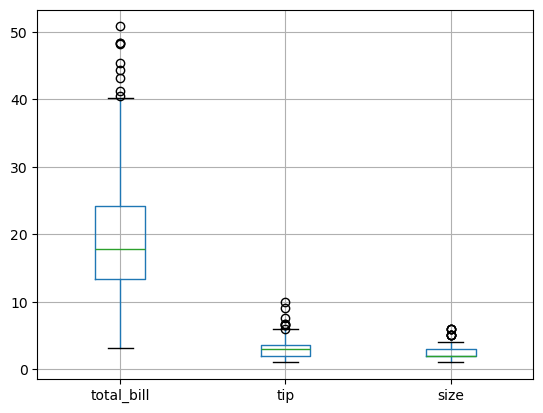

In [7]:
# Finding all outliers for the numerical columns
boxplot = df.boxplot(column=['total_bill', 'tip', 'size'])
plt.show()

In [8]:
# Since there are no lower outliers, only the upper outliers are removed
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
iqr = q3 - q1

outliers = df.loc[(df['total_bill'] > q3 + 1.5 * iqr)].index

df.drop(outliers, inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3 - q1

outliers = df.loc[(df['tip'] > q3 + 1.5 * iqr)].index

df.drop(outliers, inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
q1 = df['size'].quantile(0.25)
q3 = df['size'].quantile(0.75)
iqr = q3 - q1

outliers = df.loc[(df['size'] > q3 + 1.5 * iqr)].index

df.drop(outliers, inplace = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
# Resetting the indexes
df.reset_index(inplace = True, drop = True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
216,35.83,4.67,Female,No,Sat,Dinner,3
217,27.18,2.00,Female,Yes,Sat,Dinner,2
218,22.67,2.00,Male,Yes,Sat,Dinner,2
219,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
# Adding a tip percentage column
tip_percentage = ((df['tip']/df['total_bill']) * 100).round(2)
df['tip_percentage'] = tip_percentage
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
216,35.83,4.67,Female,No,Sat,Dinner,3,13.03
217,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
218,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
219,17.82,1.75,Male,No,Sat,Dinner,2,9.82


In [13]:
# Re-arranging the columns
columns = df.columns.tolist()
columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_percentage']

In [14]:
columns = columns[:2] + columns[-1:] + columns[2:7]
columns

['total_bill', 'tip', 'tip_percentage', 'sex', 'smoker', 'day', 'time', 'size']

In [15]:
df = df[columns]
df

,total_bill,tip,tip_percentage,sex,smoker,day,time,size
0,16.99,1.01,5.94,Female,No,Sun,Dinner,2
1,10.34,1.66,16.05,Male,No,Sun,Dinner,3
2,21.01,3.50,16.66,Male,No,Sun,Dinner,3
3,23.68,3.31,13.98,Male,No,Sun,Dinner,2
4,24.59,3.61,14.68,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
216,35.83,4.67,13.03,Female,No,Sat,Dinner,3
217,27.18,2.00,7.36,Female,Yes,Sat,Dinner,2
218,22.67,2.00,8.82,Male,Yes,Sat,Dinner,2
219,17.82,1.75,9.82,Male,No,Sat,Dinner,2


# Q1: What is the average tip, bill amount, and size?

In [16]:
# Viewing basic statistics for all columns
df.describe(include = 'all')

,total_bill,tip,tip_percentage,sex,smoker,day,time,size
count,221.000000,221.000000,221.000000,221,221,221,221,221.000000
unique,NaN,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,NaN,141,138,79,160,NaN
mean,18.223937,2.762262,16.096425,NaN,NaN,NaN,NaN,2.411765
std,7.136796,1.045498,6.113924,NaN,NaN,NaN,NaN,0.749331
min,3.070000,1.000000,3.560000,NaN,NaN,NaN,NaN,1.000000
25%,13.030000,2.000000,13.030000,NaN,NaN,NaN,NaN,2.000000
50%,16.970000,2.610000,15.430000,NaN,NaN,NaN,NaN,2.000000
75%,22.120000,3.480000,18.840000,NaN,NaN,NaN,NaN,3.000000


# Q2: What is the relationship between the characteristics (day, time, smoker, etc.) and the total bill amount (if there is any)?

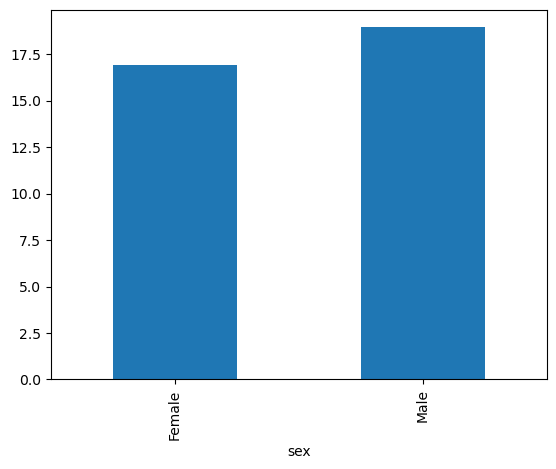

In [17]:
grouped_df = df.groupby('sex')['total_bill'].mean()
grouped_df.plot(kind = 'bar')
plt.show()

On average, the men spend more by $2 or so.

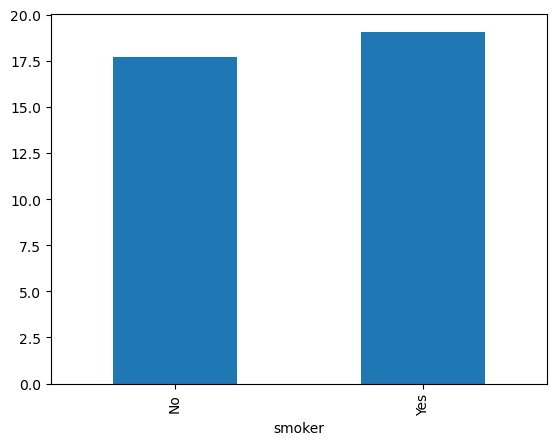

In [18]:
grouped_df2 = df.groupby('smoker')['total_bill'].mean()
grouped_df2.plot(kind = 'bar')
plt.show()

Those who smoke spend about $1.5 more than those who don't smoke.

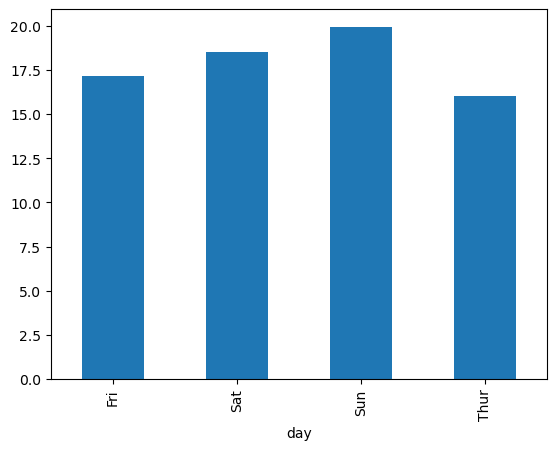

In [19]:
grouped_df3 = df.groupby('day')['total_bill'].mean()
grouped_df3.plot(kind = 'bar')
plt.show()

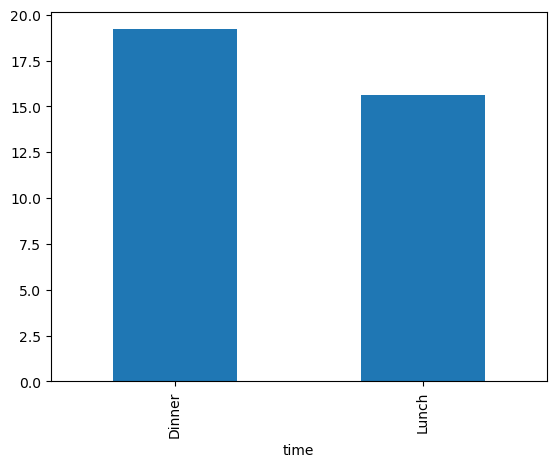

In [20]:
grouped_df4 = df.groupby('time')['total_bill'].mean()
grouped_df4.plot(kind = 'bar')
plt.show()

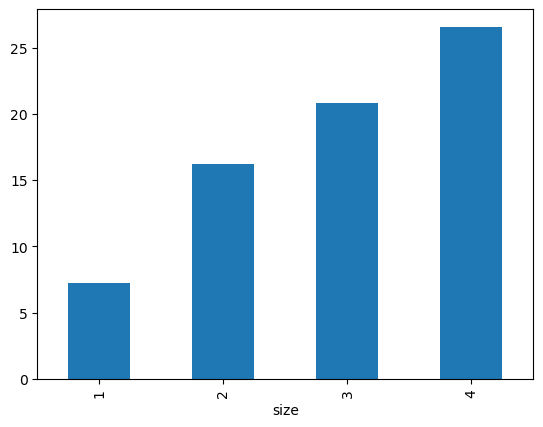

In [21]:
grouped_df5 = df.groupby('size')['total_bill'].mean()
grouped_df5.plot(kind = 'bar')
plt.show()

As expected, more money is being spent the higher the party size is.

# Q3: Is there a relationship between any of the characteristics and how much the workers are tipped?

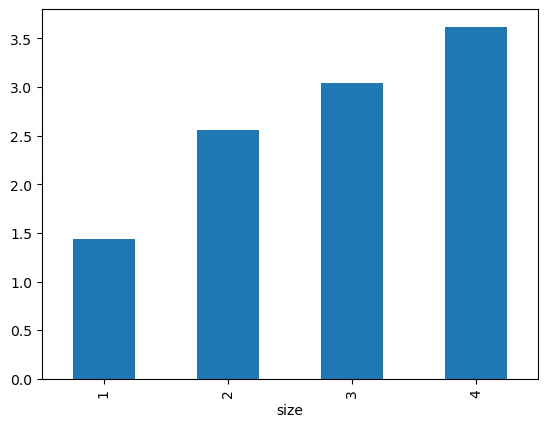

In [22]:
grouped_df6 = df.groupby('size')['tip'].mean()
grouped_df6.plot(kind = 'bar')
plt.show()

As expected, the higher the party size, the more tips the workers receive.

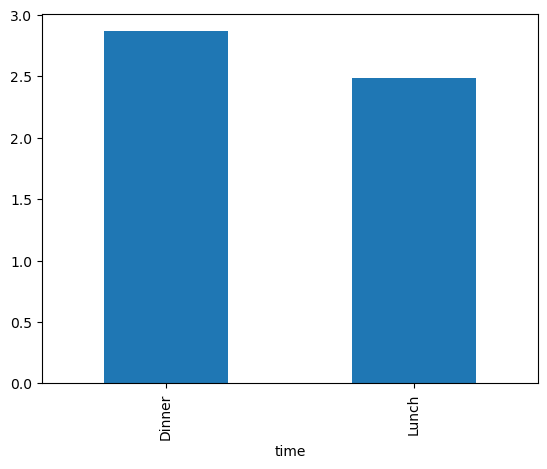

In [23]:
grouped_df7 = df.groupby('time')['tip'].mean()
grouped_df7.plot(kind = 'bar')
plt.show()

Since the total bill amount is higher during dinner time, it follows that the tip amount is also higher than the tips earned by the workers during lunch time.

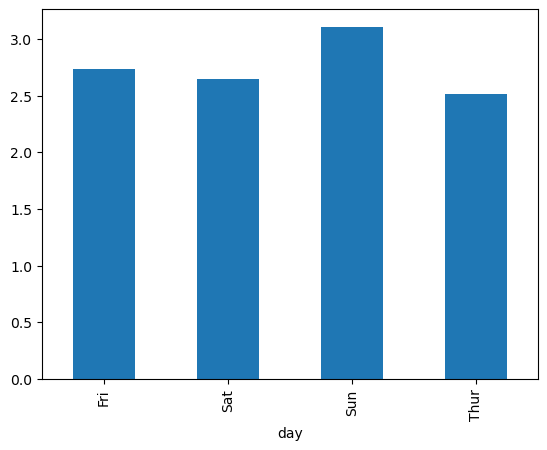

In [24]:
grouped_df8 = df.groupby('day')['tip'].mean()
grouped_df8.plot(kind = 'bar')
plt.show()

Sunday's results in the workers receiving more tips followed by Friday, Saturday, and then Thursday.

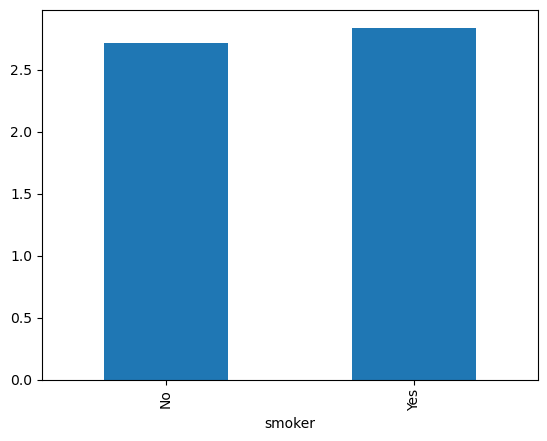

In [25]:
grouped_df9 = df.groupby('smoker')['tip'].mean()
grouped_df9.plot(kind = 'bar')
plt.show()

Those who smoke tend to give a higher tip than those who don't but by only a small amount (nothing higher than $0.5)

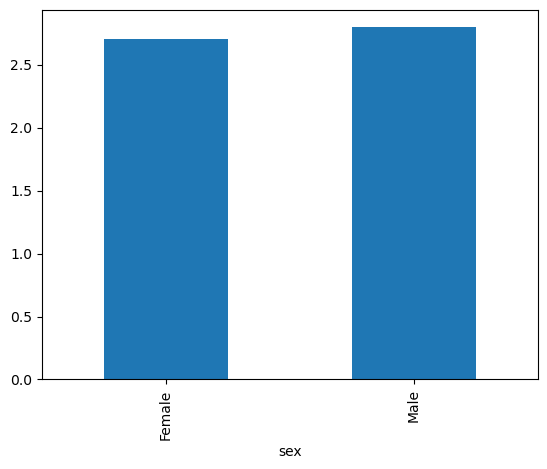

In [26]:
grouped_df10 = df.groupby('sex')['tip'].mean()
grouped_df10.plot(kind = 'bar')
plt.show()

Male customers tend to give a higher tip than the female counterparts but by only a small amount.

# Q4: How do the sizes differ by day or time?

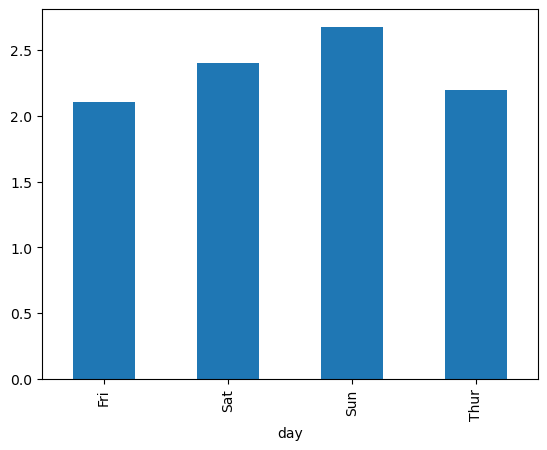

In [27]:
grouped_df11 = df.groupby('day')['size'].mean()
grouped_df11.plot(kind = 'bar')
plt.show()

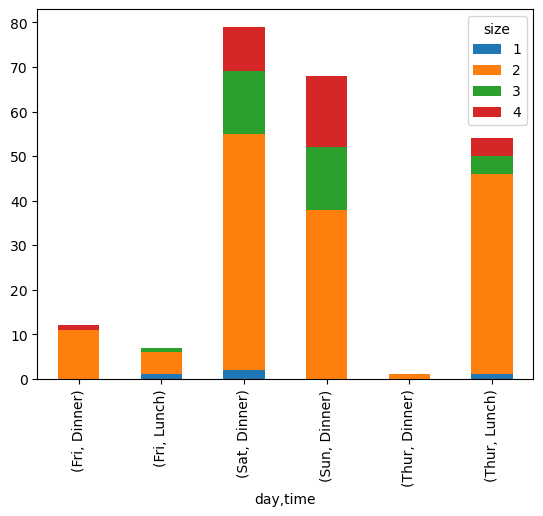

In [28]:
df.groupby(['day', 'time', 'size']).size().unstack(fill_value = 0).plot(kind = 'bar', stacked = True)
plt.show()

# Q5: What is more popular (dinner or lunch) for each day?

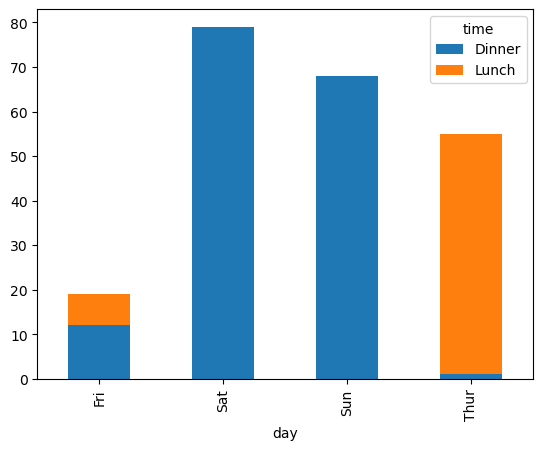

In [29]:
df.groupby(['day', 'time']).size().unstack(fill_value=0).plot(kind = 'bar', stacked = True)
plt.show()

# Q6: What is the distribution for the total bill amount and the tips that the workers recieve?

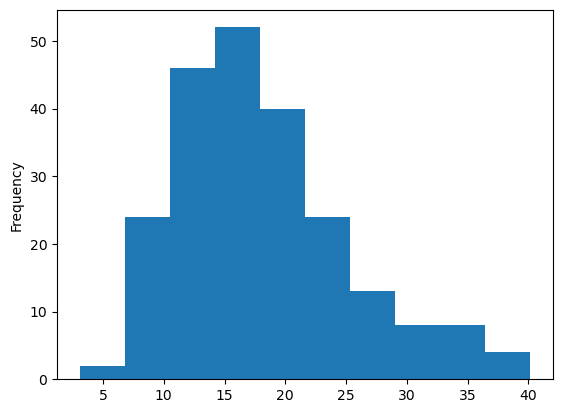

In [30]:
df['total_bill'].plot(kind = 'hist')
plt.show()

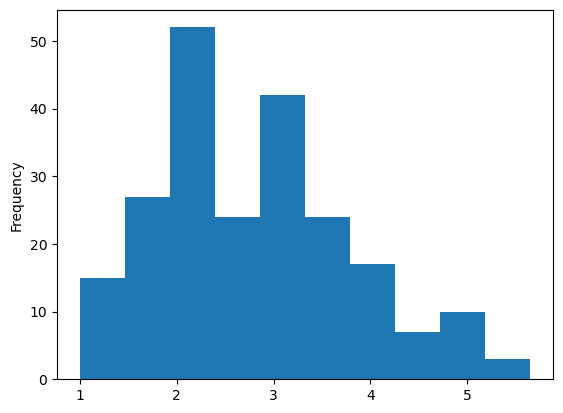

In [31]:
df['tip'].plot(kind = 'hist')
plt.show()

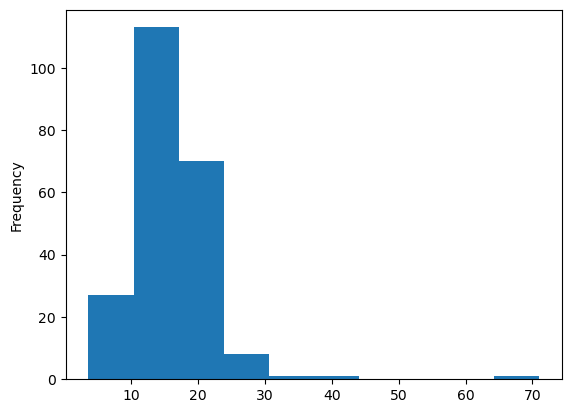

In [32]:
df['tip_percentage'].plot(kind = 'hist')
plt.show()